<a href="https://colab.research.google.com/github/ReX0171/AI-Internship/blob/main/02_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2: Predict Future Stock Prices (Short-Term)**

**I will import all required libraries that will be helpful for me in completing this task**

In [50]:
!pip install yfinance --quiet
!pip install matplotlib scikit-learn --quiet


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
stock = yf.Ticker("TSLA")
data = stock.history(period="1y")

In [54]:
# this create the 'Prev Close' feature (previous day's closing price)
data['Prev Close'] = data['Close'].shift(1)
# This will Remove the first row as it contains a NaN value for 'Prev Close'
data.dropna(inplace=True)

In [55]:
## Features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

**# Training-Test split**

In [56]:
# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Model Training**

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)#this will predict the next day closing price.
print(y_pred)

[239.9581361  240.04271449 226.17893062 239.88365081 250.74019988
 257.09949879 280.02435381 280.55970976 287.3820521  276.85360025
 289.13594336 289.15281166 277.19458733 276.08222949 273.58289841
 288.21794475 304.02013491 314.71023783 331.92997582 345.27272039
 341.36627823 348.5030228  340.24885186 349.6901466  337.57493928
 344.29149886 339.216181   361.27299879 358.95380627 360.680906
 354.49912963 339.41085635 351.67021492 331.54323387 283.81482012
 299.06902906 301.41977925 322.65530803 326.67688132 326.18331909
 329.05870781 329.15148849 318.49965109 325.97286267 323.96111361
 351.78661404 344.36753768 325.16867431 329.92602359 322.7305232 ]


Plotting actual vs predicted data

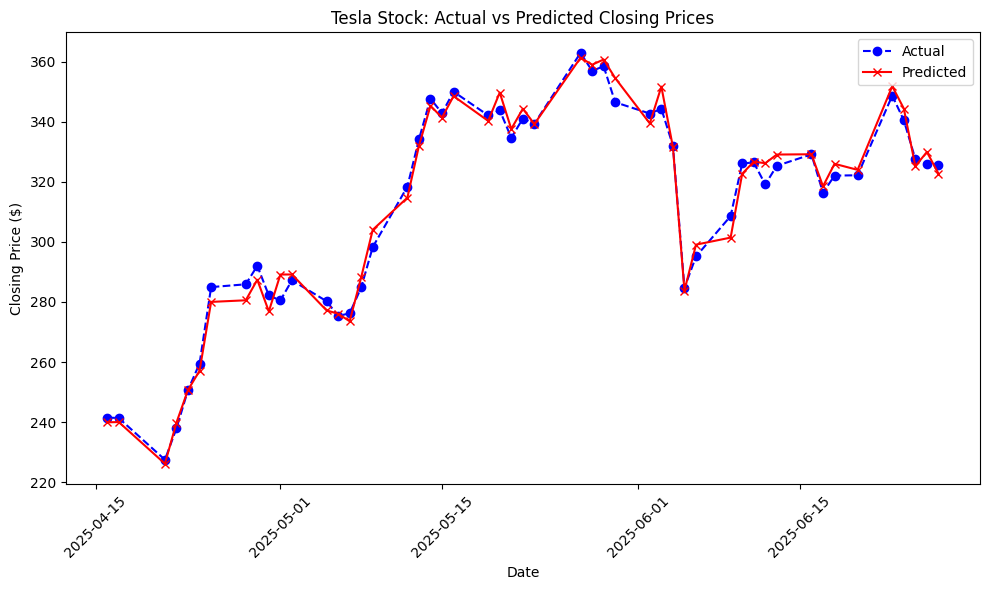

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linestyle='--', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='-', marker='x')
plt.title("Tesla Stock: Actual vs Predicted Closing Prices")
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Performance Evaluation using MAE and RMSE**

In [62]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 3.12
Root Mean Squared Error (RMSE): 3.76
